In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os.chdir('C:/Users/zitou/OneDrive/Bureau/Cours/projet_info')

In [6]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [7]:
data = data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','value_eur','wage_eur','international_reputation',
           'real_face','release_clause_eur','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until',
            'nation_position','nation_jersey_number','player_traits','work_rate','potential'],axis = 1)  

In [19]:
def first_position(value):
    l = value
    if len(l)>2:
        if l[2]==',':
            return(str(l[0])+str(l[1]))
        else:
            return(str(l[0])+str(l[1])+str(l[2]))
    else:
        return(str(l[0])+str(l[1]))
data['main_position'] = data['player_positions'].map(first_position)

In [24]:
#Création d'un dictionnaire pour le mapping de la colonne 'main_position'

groups_positions = {
    'GK': 'goal',
    'LWB': 'left back',
    'LB': 'left back',
    'CB': 'center back',
    'RB': 'right back',
    'RWB': 'right back',
    'LW': 'left mid',
    'LM': 'left mid',
    'CDM': 'defensive mid',
    'RM': 'right mid',
    'RW': 'right mid',
    'CAM': 'offensive mid',
    'CM': 'offensive mid',
    'ST': 'striker',
    'CF': 'striker'
}

In [25]:
#On mappe
data['class_position'] = data['main_position'].map(groups_positions)

In [27]:
data = data.drop(['player_positions'],axis = 1)

In [53]:

def main_score(value):
    '''Destinée à convertir les 45+3 et 45, les + ne représentant que les bonus'''
    l = str(value)
    if l != 'nan':
        if len(l)==2:
            return(int(l))
        else:
            if l[2] == '+':
                return int(str(l[0])+str(l[1]))
            else :
                return int(str(l[0]) + str(l[1]) + str(l[2]))

    

In [58]:
for label in ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
              'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']:
    data[label+'_score'] = data[label].map(main_score)

In [60]:
data = data.fillna(-1)
data = data.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
              'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis = 1)

In [61]:
data

,age,height_cm,weight_kg,overall,preferred_foot,weak_foot,skill_moves,body_type,team_position,pace,...,lwb_score,ldm_score,cdm_score,rdm_score,rwb_score,lb_score,lcb_score,cb_score,rcb_score,rb_score
0,32,170,72,94,Left,4,4,Messi,RW,87.0,...,68,66,66,66,68,63,52,52,52,63
1,34,187,83,93,Right,4,5,C. Ronaldo,LW,90.0,...,65,61,61,61,65,61,53,53,53,61
2,27,175,68,92,Right,5,5,Neymar,CAM,91.0,...,66,61,61,61,66,61,46,46,46,61
3,26,188,87,91,Right,3,1,Normal,GK,-1.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,28,175,74,91,Right,4,4,Normal,LW,91.0,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,Right,3,2,Normal,RES,57.0,...,43,42,42,42,43,45,46,46,46,45
18274,22,177,66,48,Right,2,2,Normal,SUB,58.0,...,44,43,43,43,44,46,47,47,47,46
18275,19,186,75,48,Right,2,2,Lean,SUB,54.0,...,47,49,49,49,47,47,49,49,49,47
18276,18,185,74,48,Right,2,2,Lean,SUB,59.0,...,48,48,48,48,48,48,49,49,49,48


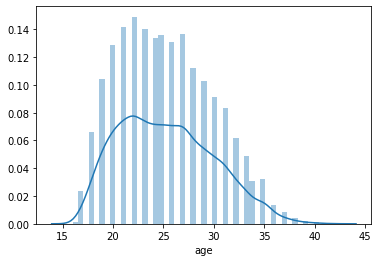

In [118]:
sns.distplot(data['age'])